# Importing Packages

In [64]:
import pandas as pd #pandas for dataset handling
import numpy as np #numpy to Support for Pandas and calculations 
import matplotlib.pyplot as plt #Matplotlib for visualization (Plotting graphs)
from matplotlib import ticker 
import pycountry_convert as pc #pycountry_convert for getting continent (name) to from their country names
import folium #folium for map 
from datetime import datetime,date
from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline


# Reading Data

In [3]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

# Preprocessing

In [4]:
df_covid19.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [5]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [6]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state", "Country/Region":"country"})

In [7]:
df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})

In [8]:
df_deaths.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [9]:
df_deaths = df_deaths.rename(columns={"Province/State":"state", "Country/Region":"country"})

In [10]:
df_covid19.columns

Index(['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [11]:
df_covid19 = df_covid19.rename(columns={"Country_Region":"country"})

In [12]:
# Active = Confirmed - Recovered - Deaths
df_covid19['Active'] = df_covid19['Confirmed'] - df_covid19['Recovered'] - df_covid19['Deaths']

In [13]:
df_covid19.columns

Index(['country', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [14]:
df_confirmed["country"].replace({"US": "USA", "Korea": "South Korea", "Taiwan*":"Taiwan",
                                 "Congo (Kinshasa)":"Democratic Republic of the Congo",
                                 "Cote d'Ivoire":"Côte d'Ivoire",
                                 "Reunion":"Réunion",
                                 "Congo (Brazzaville)":"Republic of the Congo",
                                 "Bahamas, The":"Bahamas",
                                 "Gambia, The":"Gambia"}, inplace=True)

In [15]:
df_deaths['country'].replace({"US": "USA", "Korea": "South Korea", "Taiwan*":"Taiwan",
                                 "Congo (Kinshasa)":"Democratic Republic of the Congo",
                                 "Cote d'Ivoire":"Côte d'Ivoire",
                                 "Reunion":"Réunion",
                                 "Congo (Brazzaville)":"Republic of the Congo",
                                 "Bahamas, The":"Bahamas",
                                 "Gambia, The":"Gambia"}, inplace=True)

In [16]:
df_covid19['country'].replace({"US": "USA", "Korea": "South Korea", "Taiwan*":"Taiwan",
                                 "Congo (Kinshasa)":"Democratic Republic of the Congo",
                                 "Cote d'Ivoire":"Côte d'Ivoire",
                                 "Reunion":"Réunion",
                                 "Congo (Brazzaville)":"Republic of the Congo",
                                 "Bahamas, The":"Bahamas",
                                 "Gambia, The":"Gambia"}, inplace=True)

In [17]:
df_table['Country_Region'].replace({"US": "USA", "Korea": "South Korea", "Taiwan*":"Taiwan",
                                 "Congo (Kinshasa)":"Democratic Republic of the Congo",
                                 "Cote d'Ivoire":"Côte d'Ivoire",
                                 "Reunion":"Réunion",
                                 "Congo (Brazzaville)":"Republic of the Congo",
                                 "Bahamas, The":"Bahamas",
                                 "Gambia, The":"Gambia"}, inplace=True)

In [18]:
# Getting all countries
countries = np.asarray(df_confirmed['country'])
countries1 = np.asarray(df_covid19['country'])

In [19]:
# Continent_code to Continent_names
continents = {
    'NA' : "North America",
    "SA" : "South America",
    "AS" : "Asia",
    "OC" : "Australia",
    "AF" : "Africa",
    "EU" : "Europe",
    "na" : "Others"
}

In [20]:
# Defining Function for getting continent code for country.
def country_to_continent_code(country):
  try:
    return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
  except:
    return 'na'

In [21]:
#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])


In [22]:
df_table = df_table[df_table['continent'] != "Others"]

In [23]:
df_deaths['continent'][df_deaths['continent'] == "Others"]

88     Others
127    Others
143    Others
236    Others
241    Others
247    Others
248    Others
252    Others
261    Others
Name: continent, dtype: object

In [24]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [25]:
np.sum(df_deaths.iloc[:,5:])

1/22/20        17
1/23/20        18
1/24/20        26
1/25/20        42
1/26/20        56
1/27/20        82
1/28/20       131
1/29/20       133
1/30/20       171
1/31/20       213
2/1/20        259
2/2/20        362
2/3/20        426
2/4/20        492
2/5/20        564
2/6/20        634
2/7/20        719
2/8/20        806
2/9/20        906
2/10/20      1013
2/11/20      1113
2/12/20      1118
2/13/20      1371
2/14/20      1523
2/15/20      1666
2/16/20      1770
2/17/20      1868
2/18/20      2007
2/19/20      2122
2/20/20      2247
            ...  
3/12/20      4720
3/13/20      5404
3/14/20      5819
3/15/20      6440
3/16/20      7126
3/17/20      7905
3/18/20      8733
3/19/20      9867
3/20/20     11299
3/21/20     12973
3/22/20     14651
3/23/20     16505
3/24/20     18625
3/25/20     21181
3/26/20     23970
3/27/20     27198
3/28/20     30652
3/29/20     33925
3/30/20     37582
3/31/20     42107
4/1/20      46809
4/2/20      52983
4/3/20      58787
4/4/20      64606
4/5/20    

In [26]:
#Defining Function
def get_total_cases(cases, country = 'All'):
  if(country == 'All'):
    return np.sum(np.asarray(case.iloc[:,5:]), axis=0)[-1]
  else:
    return np.sum(np.asarray(cases[cases['country'] == country].iloc[:,5:]), axis=0)[-1]

# General Analysis of Data

In [27]:
#Getting country wise and continent wise data.

In [28]:
df_countries_cases = df_covid19.copy().drop(['Lat', 'Long_', 'continent', 'Last_Update'], axis=1)

In [29]:
df_countries_cases.index = df_countries_cases['country']

In [30]:
df_countries_cases = df_countries_cases.drop(['country'], axis=1)

In [31]:

df_continents_cases = df_covid19.copy().drop(['Lat', 'Long_', 'country', 'Last_Update'], axis=1)

In [32]:
df_continents_cases = df_continents_cases.groupby(['continent']).sum()

# Continent Wise Reported Cases

In [33]:
#Continent Wise reported confirmed cases, recovered cases, deaths, active cases
df_continents_cases

,Confirmed,Deaths,Recovered,Active
continent,,,,
Africa,12962,695,2147,10120
Asia,264770,10021,127056,127693
Australia,7622,60,2228,5334
Europe,821944,70114,197058,554772
North America,535391,19862,36129,479400
Others,11731,233,7839,3659
South America,45070,1815,4583,38672


# Global Reported Cases till Date

In [34]:
#Total number of confirmed cases, deaths reported, revoveries and active cases all across the world
df_countries_cases.sum()

Confirmed    1699490
Deaths        102800
Recovered     377040
Active       1219650
dtype: int64

In [35]:
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Wistia')


,Confirmed,Deaths,Recovered,Active
country,,,,
USA,501615,18777,29191,453647
Spain,158273,16081,55668,86524
Italy,147577,18849,30455,98273
France,125931,13215,25195,87521
Germany,122171,2736,53913,65522
China,83003,3343,77844,1816
United Kingdom,74605,8974,588,65043
Iran,68192,4232,35465,28495
Turkey,47029,1006,2423,43600


# Top 10 countries (Confirmed Cases and Deaths)

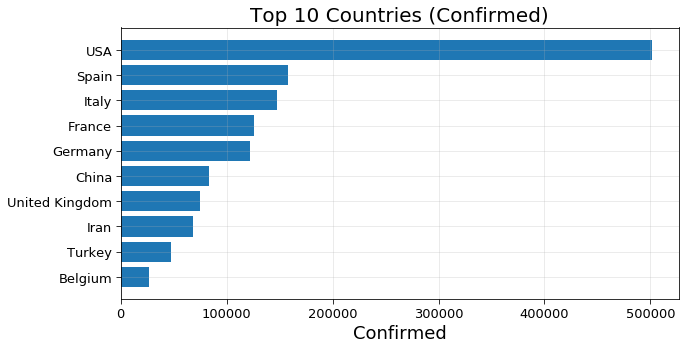

In [36]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],)
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed",fontsize=18)
plt.title("Top 10 Countries (Confirmed)",fontsize=20)
plt.grid(alpha=0.3)

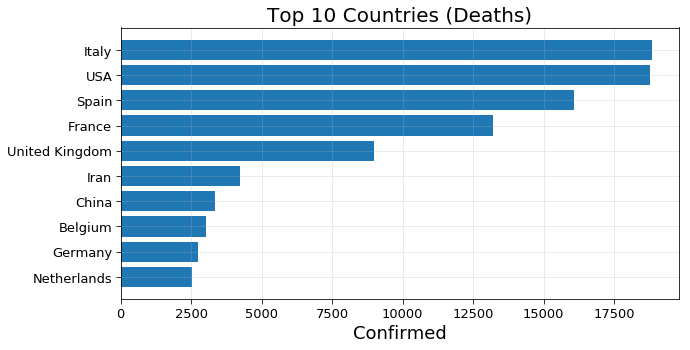

In [37]:
f = plt.figure(figsize=(10,5))
f.add_subplot(111)

plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:])
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed",fontsize=18)
plt.title("Top 10 Countries (Deaths)",fontsize=20)
plt.grid(alpha=0.3)

# Correlation Analysis

In [38]:
#Plotting Heat map of correlation of confirmed cases, recovered cases, deaths and active cases.


# Country wise Correlation

In [39]:
df_countries_cases.corr().style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Confirmed,1,0.853387,0.614753,0.976902
Deaths,0.853387,1,0.635319,0.785993
Recovered,0.614753,0.635319,1,0.434433
Active,0.976902,0.785993,0.434433,1


# Continent Wise Correlation

In [40]:
df_continents_cases.corr().style.background_gradient(cmap='Reds')

,Confirmed,Deaths,Recovered,Active
Confirmed,1,0.934339,0.826227,0.97911
Deaths,0.934339,1,0.866421,0.870646
Recovered,0.826227,0.866421,1,0.695992
Active,0.97911,0.870646,0.695992,1


# Visualization on Map

In [41]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map

# COVID-19 Spread Analysis

#  Spread Across Globe

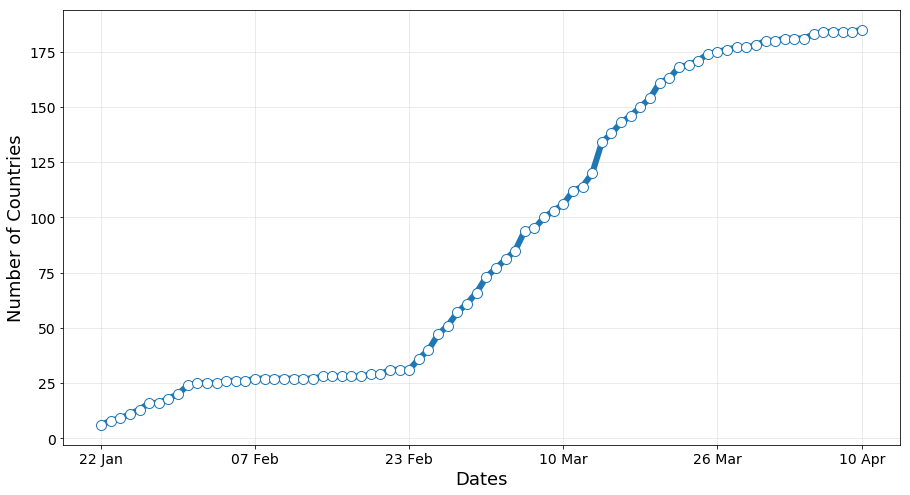

In [43]:
# Number of countries affected over the time
case_nums_country = df_confirmed.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: x[x > 0].count(), axis =0)
d = [datetime.strptime(date,'%m/%d/%y').strftime("%d %b") for date in case_nums_country.index]

f = plt.figure(figsize=(15,8))
f.add_subplot(111)

marker_style = dict(linewidth=6, linestyle='-', marker='o',markersize=10, markerfacecolor='#ffffff')
plt.plot(d, case_nums_country,**marker_style)
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(d)-1,int(len(d)/5)))+[len(d)-1],d[:-1:int(len(d)/5)]+[d[-1]])

#labels
plt.xlabel("Dates",fontsize=18)
plt.ylabel("Number of Countries",fontsize=18)
plt.grid(alpha = 0.3)

# Date on which Countries gets its first COVID-19 Case : Epedemic Span (Gantt Chart)

In [44]:
df_active = df_confirmed.copy()
df_active.iloc[:,5:] = df_active.iloc[:,5:] - df_recovered.iloc[:,5:] - df_deaths.iloc[:,5:]
df_active.head(5)

,state,country,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,,Afghanistan,Asia,33.0000,65.0000,NaN,0.0,0.0,0.0,0.0,...,228.0,257.0,265.0,282.0,327.0,338.0,391.0,401.0,437.0,474.0
1,,Albania,Europe,41.1533,20.1683,NaN,0.0,0.0,0.0,0.0,...,177.0,185.0,198.0,214.0,237.0,240.0,230.0,224.0,221.0,211.0
2,,Algeria,Africa,28.0339,1.6596,NaN,0.0,0.0,0.0,0.0,...,728.0,839.0,1004.0,1031.0,1078.0,1160.0,1162.0,1130.0,1084.0,1100.0
3,,Andorra,Europe,42.5063,1.5218,NaN,0.0,0.0,0.0,0.0,...,366.0,403.0,407.0,428.0,457.0,473.0,484.0,489.0,500.0,504.0
4,,Angola,Africa,-11.2027,17.8739,NaN,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,6.0,10.0,12.0,13.0,15.0,15.0,15.0


In [45]:
df_active= df_active.rename(columns={"Province/State":"state","Country/Region": "country"})

In [46]:
df_active["country"]

0                 Afghanistan
1                     Albania
2                     Algeria
3                     Andorra
4                      Angola
5         Antigua and Barbuda
6                   Argentina
7                     Armenia
8                   Australia
9                   Australia
10                  Australia
11                  Australia
12                  Australia
13                  Australia
14                  Australia
15                  Australia
16                    Austria
17                 Azerbaijan
18                    Bahamas
19                    Bahrain
20                 Bangladesh
21                   Barbados
22                    Belarus
23                    Belgium
24                      Benin
25                     Bhutan
26                    Bolivia
27     Bosnia and Herzegovina
28                     Brazil
29                     Brunei
                ...          
234                Mozambique
235                     Syria
236       

In [47]:
df_active = df_active.replace(np.nan, '', regex=True)

In [48]:
def dd(date1,date2):
  return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days

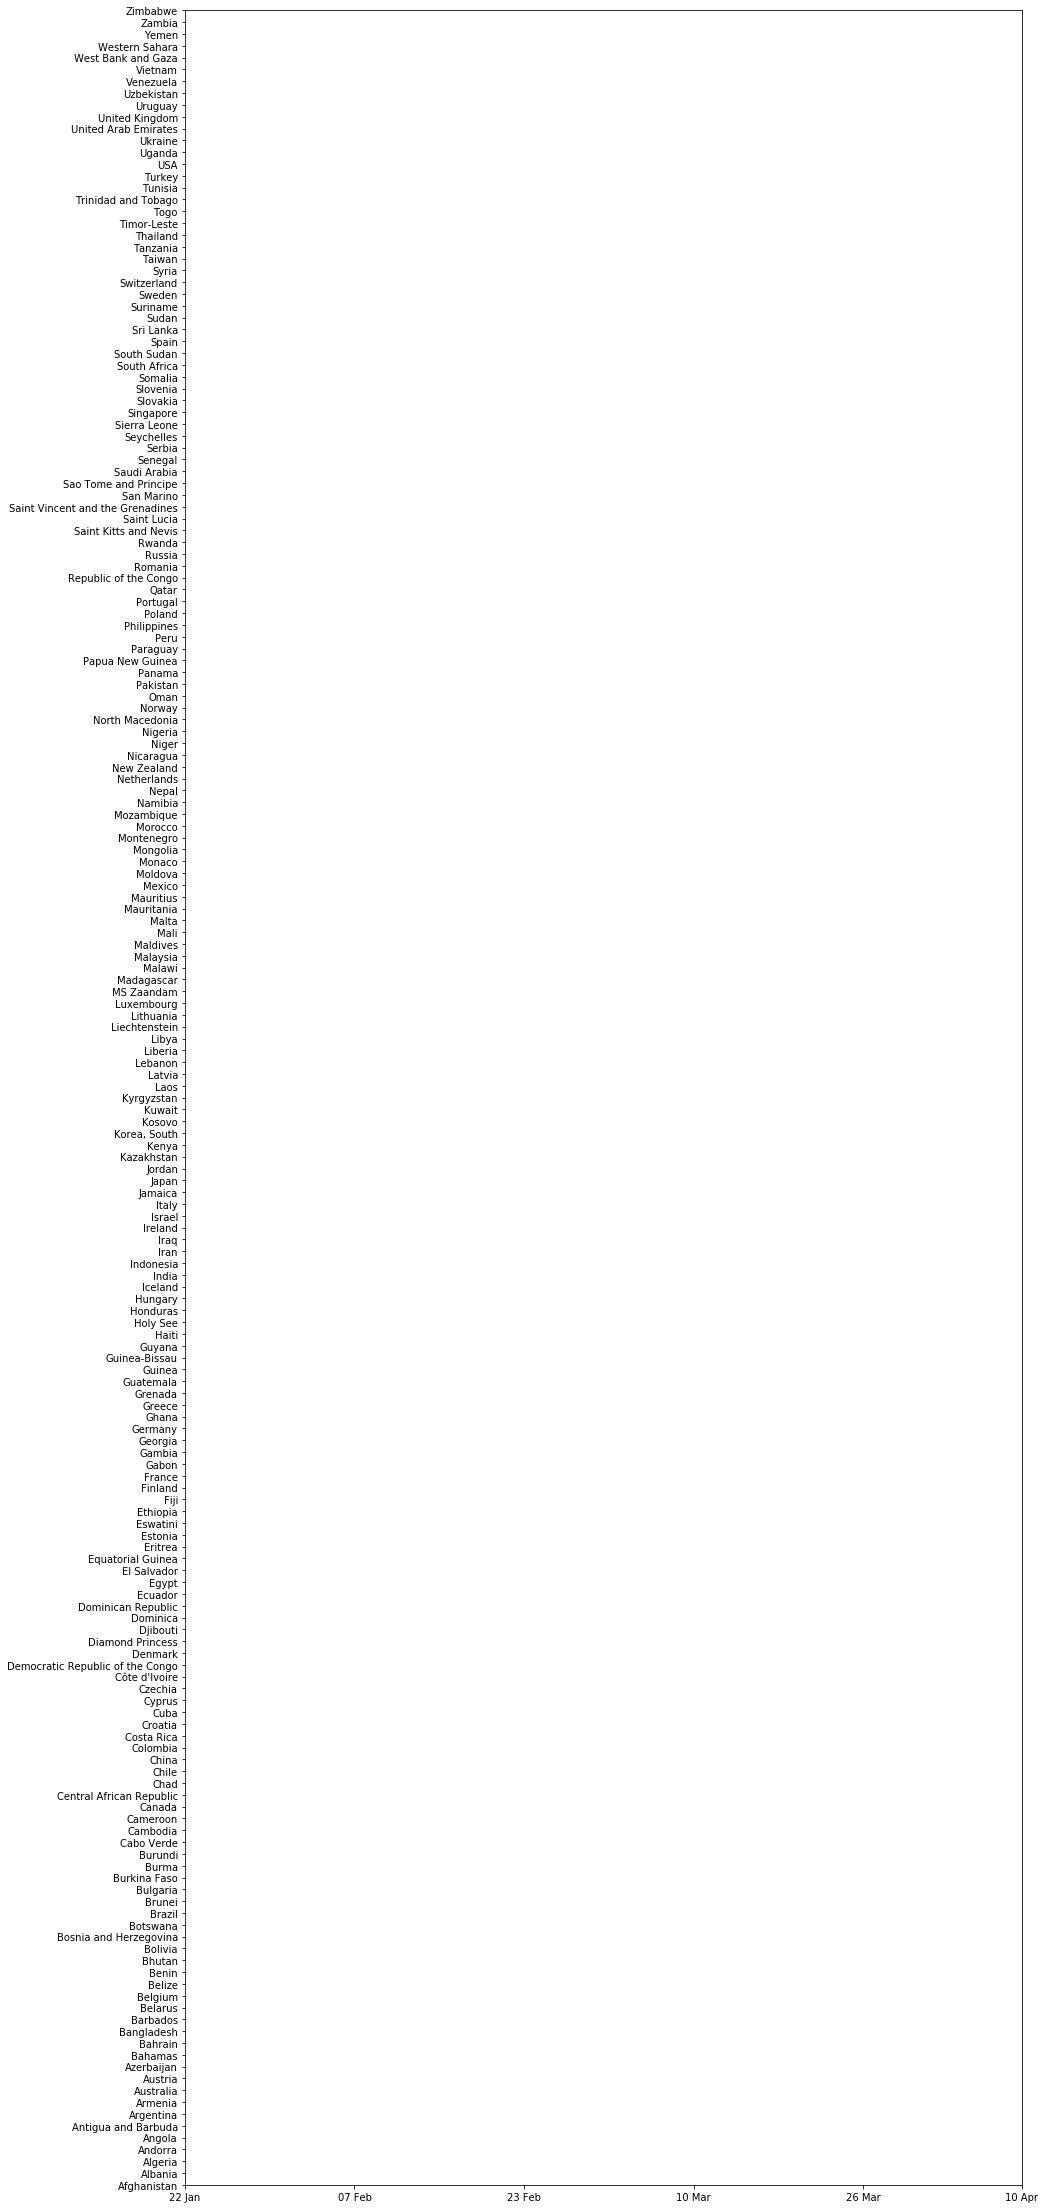

In [59]:
c = df_active.groupby("country").sum().drop(['Lat','Long'],axis =1).apply(lambda x: [d(x[x > 0].index[0] , x.index[0]),d(x[x > 0].index[-1] , x.index[0])], axis =1)
c[c.index == "Nepal"]

plt.figure(figsize=(15,40))
for i,country in enumerate(c):
    plt.barh(0+i,country[1] - country[0],left = country[0])
#plt.tick_params(labelsize = 12)
plt.xticks(list(np.arange(0,len(d)-1,int(len(d)/5)))+[len(d)-1],d[:-1:int(len(d)/5)]+[d[-1]])
plt.yticks(np.arange(0,len(c)),c.index)
f.tight_layout()
plt.show()